## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""
import tensorflow as tf
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

keras.__version__

'2.4.3'

In [ ]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
## 資料前處理
from sklearn.preprocessing import StandardScaler
def preproc_x(x):
    x = x.reshape((len(x), -1))
    scaler = StandardScaler()
    x = (scaler.fit_transform(x) - 0.5)*2
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8, 4]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528   

In [ ]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [ ]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 11s 49ms/step - loss: 2.2827 - accuracy: 0.1340 - val_loss: 2.1367 - val_accuracy: 0.1999
Epoch 2/100
196/196 [==============================] - 12s 59ms/step - loss: 2.1090 - accuracy: 0.2061 - val_loss: 2.0383 - val_accuracy: 0.2187
Epoch 3/100
196/196 [==============================] - 9s 48ms/step - loss: 2.0148 - accuracy: 0.2233 - val_loss: 1.9312 - val_accuracy: 0.2599
Epoch 4/100
196/196 [==============================] - 9s 48ms/step - loss: 1.8914 - accuracy: 0.2868 - val_loss: 1.8339 - val_accuracy: 0.3241
Epoch 5/100
196/196 [==============================] - 10s 49ms/step - loss: 1.7662 - accuracy: 0.3481 - val_loss: 1.7469 - val_accuracy: 0.3680
Epoch 6/100
196/196 [==============================] - 9s 47ms/step - loss: 1.6475 - accuracy: 0.4107 - val_loss: 1.6432 - val_accuracy: 0.4233
Epoch 7/100
196/196 [==============================] - 9s 47ms/step - loss: 1.5361 - accuracy: 0.4573 - val_loss: 1.5897 - val_accura

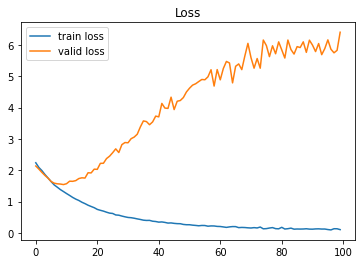

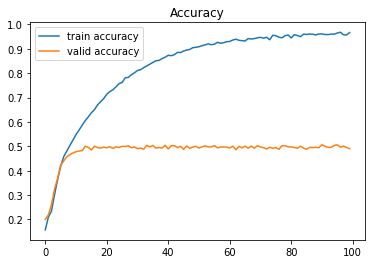

In [ ]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()